# EEG User Authentication

In this project, we will attempt to authenticate a user based on their EEG readings. The XGBoost Model will be used to learn/identify a user based on their EEG dataset. 

# Import the datasets

In [1]:
import os
import pandas as pd

# Set the directory path containing the CSV files
directory_path = r'C:\Users\Rahul Nagarajan\Desktop\Masters Project\Datasets' 

# Create an empty list to store the DataFrames
df_list = []

# Loop through all CSV files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(directory_path, filename), skiprows=1, index_col=None, header=0)
        # Select the required columns
        freq_bands = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']
        df = df.loc[:, freq_bands]
        # Add the DataFrame to the list
        df_list.append(df)

In [2]:
#Display the first five columns of one of the datasets
df_list[0].head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4290.769043,4283.077148,4305.512695,4300.769043,4295.897461,4458.333496,4297.820313,4277.179688,4265.128418,4264.615234,4444.358887,4472.820313,4365.769043,4405.769043
1,4292.820313,4292.436035,4312.820313,4308.461426,4298.205078,4450.384766,4317.051270,4282.436035,4275.384766,4270.512695,4451.282227,4479.102539,4367.051270,4406.666504
2,4296.666504,4295.897461,4311.922852,4306.153809,4297.307617,4444.871582,4327.051270,4291.922852,4281.794922,4276.922852,4459.487305,4489.615234,4374.615234,4412.051270
3,4295.641113,4281.410156,4310.128418,4296.666504,4293.461426,4436.794922,4330.256348,4299.487305,4281.410156,4278.846191,4457.051270,4491.666504,4374.871582,4412.948730
4,4292.948730,4273.974121,4307.820313,4294.358887,4292.820313,4417.692383,4318.461426,4298.077148,4282.692383,4275.000000,4453.589844,4488.205078,4368.333496,4406.794922


In [3]:
df_list[0].shape

(7814, 14)

In [4]:
#Print the column names 
print("Columns: ", df_list[0].columns)
print("Total number of columns: ",len(df_list[0].columns))

Columns:  Index(['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1',
       'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4'],
      dtype='object')
Total number of columns:  14


# Preprocessing 

In [5]:
from scipy.signal import butter, filtfilt

# Define filter parameters
lowcut = 1.0  # Hz
highcut = 50.0  # Hz
fs = 128.0  # Hz
order = 4

# Define filter function
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Loop through all dataframes in df_list
for i in range(len(df_list)):
    # Get the current dataframe
    df = df_list[i]
    
    # Define filter parameters
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    
    # Apply the filter to each column of the dataframe
    for column in df.columns:
        # Get the signal values as a numpy array
        signal = df[column].values
        
        # Apply the filter
        filtered_signal = filtfilt(b, a, signal, padlen=None)
        
        # Replace the original signal with the filtered signal
        df[column] = filtered_signal
        
    # Replace the original dataframe with the filtered dataframe in df_list
    df_list[i] = df

In [6]:
#Display the first five columns after the bandpass filter
df_list[0].head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,1.092456,0.803790,1.142760,0.927544,-0.379610,0.803327,0.809046,0.777566,0.543794,0.245568,1.753030,1.530729,1.761676,8.853914
1,3.272233,10.292483,8.187877,8.808480,2.055928,-0.104531,19.727130,5.369654,10.490482,5.972975,9.131383,7.373592,3.091813,10.035952
2,6.246585,12.223640,7.221226,6.239223,1.057134,1.281940,29.568740,14.436562,15.843151,12.466736,17.382798,17.163906,10.495904,15.672536
3,5.999887,-1.130846,5.065992,-2.813745,-2.536985,0.403633,32.517551,21.137522,15.593071,14.012328,15.512715,18.893075,10.878229,16.819263
4,2.325254,-10.095962,2.687457,-5.320499,-3.269146,-11.876730,20.274327,19.426651,15.844396,10.329562,12.379294,14.817932,4.268567,10.961752


In [7]:
df_list[0].shape

(7814, 14)

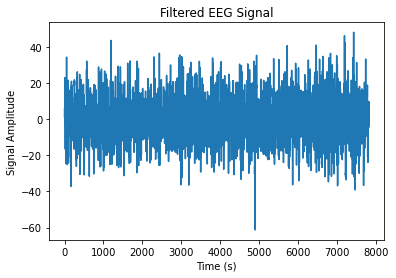

In [8]:
import matplotlib.pyplot as plt

# Plot the first channel of the first dataset in df_list
plt.plot(df_list[0].index, df_list[0]['EEG.AF3'])
plt.title('Filtered EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude')
plt.show()

# Feature Extraction

In [21]:
import pyeeg
import pandas as pd

pfd_list = []

# Iterate through each dataset in the list of dataframes
for df in df_list:
    pfd_values = []
    # Iterate through each row (epoch) in the dataframe
    for i in range(len(df)):
        # Flatten the row data into a 1D array
        epoch_data = df.iloc[i].values.flatten()
        # Compute PFD value for the epoch
        pfd = pyeeg.pfd(epoch_data)
        # Append PFD value to the list of PFD values for this dataset
        pfd_values.append(pfd)
    
    # Create a new dataframe for this dataset, with PFD values as the only column
    pfd_df = pd.DataFrame({'PFD': pfd_values})
    # Append the dataframe to the list of PFD dataframes
    pfd_list.append(pfd_df)

In [22]:
pfd_list[0]

,PFD
0,0.664071
1,0.621175
2,0.647758
3,0.664071
4,0.633610
...,...
7809,0.683192
7810,0.647758
7811,0.664071
7812,0.633610


In [23]:
def labelDatasets(pfd_list):
    #Define a list of users corresponding to their EEG datasets
    user_list = ['Abdullah', 'Andrew', 'Cleo', 'Cris', 'Kevin', 'Malem', 'Rahul', 'Shane', 'Vishwadeep']
    #Map a User label to every EEG dataset
    for i, df in enumerate(pfd_list):
        user = user_list[i]
        df['User'] = user
    
    return pfd_list

pfd_list = labelDatasets(pfd_list)

In [24]:
pfd_list[0]

,PFD,User
0,0.664071,Abdullah
1,0.621175,Abdullah
2,0.647758,Abdullah
3,0.664071,Abdullah
4,0.633610,Abdullah
...,...,...
7809,0.683192,Abdullah
7810,0.647758,Abdullah
7811,0.664071,Abdullah
7812,0.633610,Abdullah
